# **LSTM Exercise**

## Import libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)
/ LAB/Dataset/traffic.csv


In [82]:
# Fix random seed for reproducibility
tf.random.set_seed(7)

In [83]:
# Load and preprocess data
dataset = pd.read_csv('traffic.csv', index_col='DateTime', parse_dates=True)

In [84]:
# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
dataset[['Vehicles']] = scaler.fit_transform(dataset[['Vehicles']])
dataset[['Junction']] = scaler.fit_transform(dataset[['Junction']])

## Normalize the dataset

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DateTime          48120 non-null  datetime64[ns]
 1   Junction          48120 non-null  int64         
 2   Vehicles          48120 non-null  int64         
 3   ID                48120 non-null  int64         
 4   DateTime_Numeric  48120 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 1.8 MB


## split into train and test sets

In [86]:
# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset.iloc[0:train_size], dataset[train_size:len(dataset)]
print(len(train), len(test))

32240 15880


In [87]:
# Create dataset with look_back
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset.iloc[i:(i + look_back)].values
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back, 1])
    return np.array(dataX), np.array(dataY)

In [88]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [59]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [89]:
# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))

## Fit the LSTM

In [90]:
# Define and fit the model
model = Sequential()
model.add(LSTM(4, input_shape=(look_back , trainX.shape[2])))
model.add(Dense(1))

In [91]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [92]:
model.fit(trainX, trainY, epochs=20, batch_size=32, verbose=2, shuffle=False)

Epoch 1/20
1008/1008 - 4s - 4ms/step - loss: 0.0086
Epoch 2/20
1008/1008 - 2s - 2ms/step - loss: 0.0083
Epoch 3/20
1008/1008 - 4s - 4ms/step - loss: 0.0082
Epoch 4/20
1008/1008 - 4s - 4ms/step - loss: 0.0082
Epoch 5/20
1008/1008 - 2s - 2ms/step - loss: 0.0082
Epoch 6/20
1008/1008 - 3s - 3ms/step - loss: 0.0082
Epoch 7/20
1008/1008 - 3s - 3ms/step - loss: 0.0082
Epoch 8/20
1008/1008 - 3s - 3ms/step - loss: 0.0082
Epoch 9/20
1008/1008 - 4s - 4ms/step - loss: 0.0082
Epoch 10/20
1008/1008 - 2s - 2ms/step - loss: 0.0082
Epoch 11/20
1008/1008 - 2s - 2ms/step - loss: 0.0082
Epoch 12/20
1008/1008 - 3s - 3ms/step - loss: 0.0082
Epoch 13/20
1008/1008 - 3s - 3ms/step - loss: 0.0082
Epoch 14/20
1008/1008 - 4s - 4ms/step - loss: 0.0082
Epoch 15/20
1008/1008 - 3s - 3ms/step - loss: 0.0082
Epoch 16/20
1008/1008 - 3s - 3ms/step - loss: 0.0082
Epoch 17/20
1008/1008 - 5s - 5ms/step - loss: 0.0082
Epoch 18/20
1008/1008 - 2s - 2ms/step - loss: 0.0082
Epoch 19/20
1008/1008 - 3s - 3ms/step - loss: 0.0082
Ep

## Make preductuion and evaluatuin matrix.

In [94]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1008/1008 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [95]:
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY.reshape(-1, 1))
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY.reshape(-1, 1))

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.48 RMSE
Test Score: 0.17 RMSE


## Visualize the result

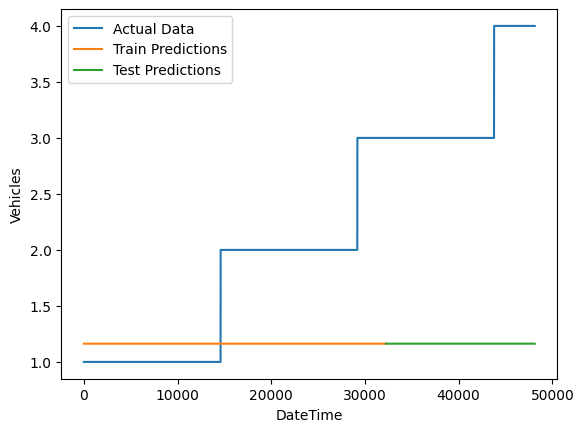

In [104]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, 0] = trainPredict[:, 0]

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2):, 0] = testPredict[:, 0]

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)[:, 0], label='Actual Data')
plt.plot(trainPredictPlot[:, 0], label='Train Predictions')
plt.plot(testPredictPlot[:, 0], label='Test Predictions')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

# **Well done** :)